In [5]:
# import the modules
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [6]:
# Code starts here
train = pd.read_csv("train.csv")

# Dependent variable
y = train['attr1089']

# Independent variable
X = train.drop(columns=['Id', 'Unnamed: 0', 'attr1089'])
# Code ends here

### Visualize the data

- Check the distribution of the target variable. Is the data imbalanced?
- Clean the data, apply some data preprocessing and engineering techniques.

1    3080
0    2812
Name: attr1089, dtype: int64


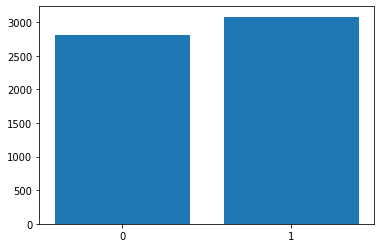

In [7]:
#Storing value counts of target variable in 'fully_paid'
crater_count = y.value_counts()
print(y.value_counts())

#Plotting bar plot
plt.bar(crater_count.index, crater_count, tick_label = [1,0])
plt.show()

# Standardize the data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)



### Model building

- Split the data into train and test.
- Now let's come to the actual task, predict the values of `attr1089` after building a Machine learning model.
- Try improving upon the `roc_auc_score` ([ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score))

In [8]:
# Code starts here

# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

# Initialize the logistic regression
lr = LogisticRegression()

# Fit the model 
lr.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = lr.predict(X_test)

# roc score
roc_score = roc_auc_score(y_pred,y_test)
print(roc_score)

0.8118598822215637


In [9]:
# Can we improve our model's performance with Decision Tree algorithm?

# Initialize decision tree
dt = DecisionTreeClassifier(random_state = 4)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred = dt.predict(X_test)

# ROC score
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.863399710814684


In [10]:
# Can we improve our model's performance with Random forrest algorithm?

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(random_state=4)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.8965213084929904


In [11]:
# Bagginng or Bootstrap aggregation

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,n_estimators=100,max_samples=100)

# Fit the model on training data
bagging_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred = bagging_clf.predict(X_test)

# accuracy 
print(bagging_clf.score(X_test,y_test))

# roc_score
score_bagging = roc_auc_score(y_test,y_pred)
print(score_bagging)

0.8252262443438914
0.822202991669564


In [12]:
# Voting Classifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Code starts here
# Initialize voting classifier
voting_clf_hard = VotingClassifier(estimators=model_list,voting='hard')

# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)

# accuracy
hard_voting_score = voting_clf_hard.score(X_test,y_test)
print(hard_voting_score)

0.8947963800904978


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [13]:
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Apply the transformations on test
test = test.drop(columns=['Id', 'Unnamed: 0'])
test = scaler.transform(test)

# Predict on the test data
y_pred_test = rfc.predict(test)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'attr1089':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('submission_test.csv',index=False)

# Code ends here